#### Author: @github.com/nilesh14k

#### reading file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

main_df = pd.read_csv("data/covid_data.csv")
main_df

Name  WHO Region  \
Global                                NaN   199466211   
United States of America         Americas    35010407   
India                     South-East Asia    31769132   
Brazil                           Americas    19953501   
Russian Federation                 Europe     6356784   
...                                   ...         ...   
Saint Helena                       Africa           0   
Tokelau                   Western Pacific           0   
Tonga                     Western Pacific           0   
Turkmenistan                       Europe           0   
Tuvalu                    Western Pacific           0   

                          Cases - cumulative total  \
Global                                 2559.050333   
United States of America              10577.080000   
India                                  2302.100000   
Brazil                                 9387.260000   
Russian Federation                     4355.920000   
...                                            ...   
Saint Helena                              0.000000   
Tokelau                                   0.000000   
Tonga                                     0.000000   
Turkmenistan                              0.000000   
Tuvalu                                    0.000000   

                          Cases - cumulative total per 100000 population  \
Global                                                           4158340   
United States of America                                          618994   
India                                                             284527   
Brazil                                                            245839   
Russian Federation                                                161552   
...                                                                  ...   
Saint Helena                                                           0   
Tokelau                                                                0   
Tonga                                                                  0   
Turkmenistan                                                           0   
Tuvalu                                                                 0   

                          Cases - newly reported in last 7 days  \
Global                                                53.349393   
United States of America                             187.010000   
India                                                 20.620000   
Brazil                                               115.660000   
Russian Federation                                   110.700000   
...                                                         ...   
Saint Helena                                           0.000000   
Tokelau                                                0.000000   
Tonga                                                  0.000000   
Turkmenistan                                           0.000000   
Tuvalu                                                 0.000000   

                          Cases - newly reported in last 7 days per 100000 population  \
Global                                                               548167             
United States of America                                              78722             
India                                                                 42625             
Brazil                                                                15143             
Russian Federation                                                    22589             
...                                                                     ...             
Saint Helena                                                              0             
Tokelau                                                                   0             
Tonga                                                                     0             
Turkmenistan                                                              0             
Tuvalu

Contents in csv file:                COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
0          Afghanistan  AFG       EMRO   REPORTING   2022-11-08   
1              Albania  ALB       EURO   REPORTING   2022-10-23   
2              Algeria  DZA       AFRO   REPORTING   2022-09-04   
3       American Samoa  ASM       WPRO   REPORTING   2022-08-23   
4              Andorra  AND       EURO   REPORTING   2022-10-16   
..                 ...  ...        ...         ...          ...   
224           Viet Nam  VNM       WPRO   REPORTING   2022-10-27   
225  Wallis and Futuna  WLF       WPRO   REPORTING   2022-07-26   
226              Yemen  YEM       EMRO   REPORTING   2022-11-08   
227             Zambia  ZMB       AFRO   REPORTING   2022-10-30   
228           Zimbabwe  ZWE       AFRO   REPORTING   2022-10-16   

     TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
0            12174141.0                     11196779.0   
1             2996383.0                      1339532.0   

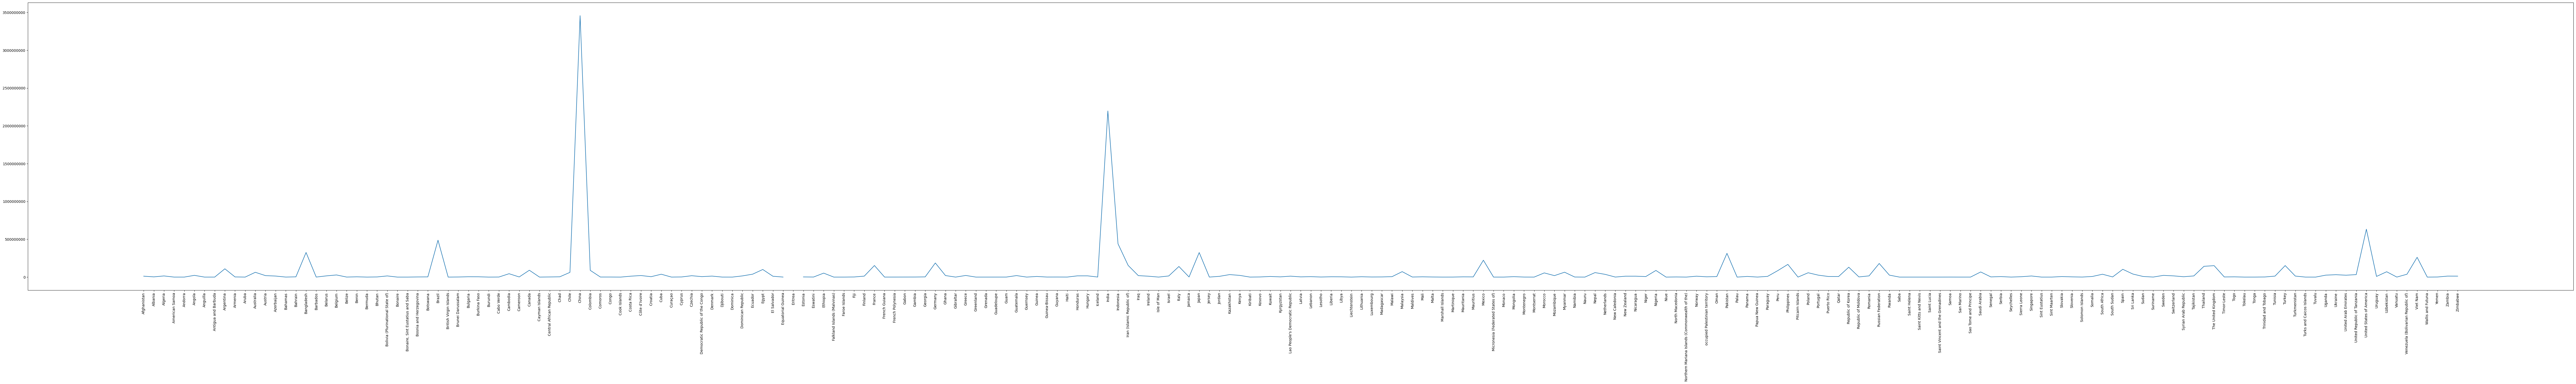

In [4]:
main_df = pd.read_csv("data/vaccination_data.csv")
# main_df

plt.rcParams["figure.figsize"] = [100,15]
plt.rcParams["figure.autolayout"] = True
columns = ["COUNTRY", "TOTAL_VACCINATIONS"]
print("Contents in csv file:", main_df)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation='vertical')
plt.plot(main_df.COUNTRY, main_df.TOTAL_VACCINATIONS)
plt.show()

D:\Users\Navneet Kumar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


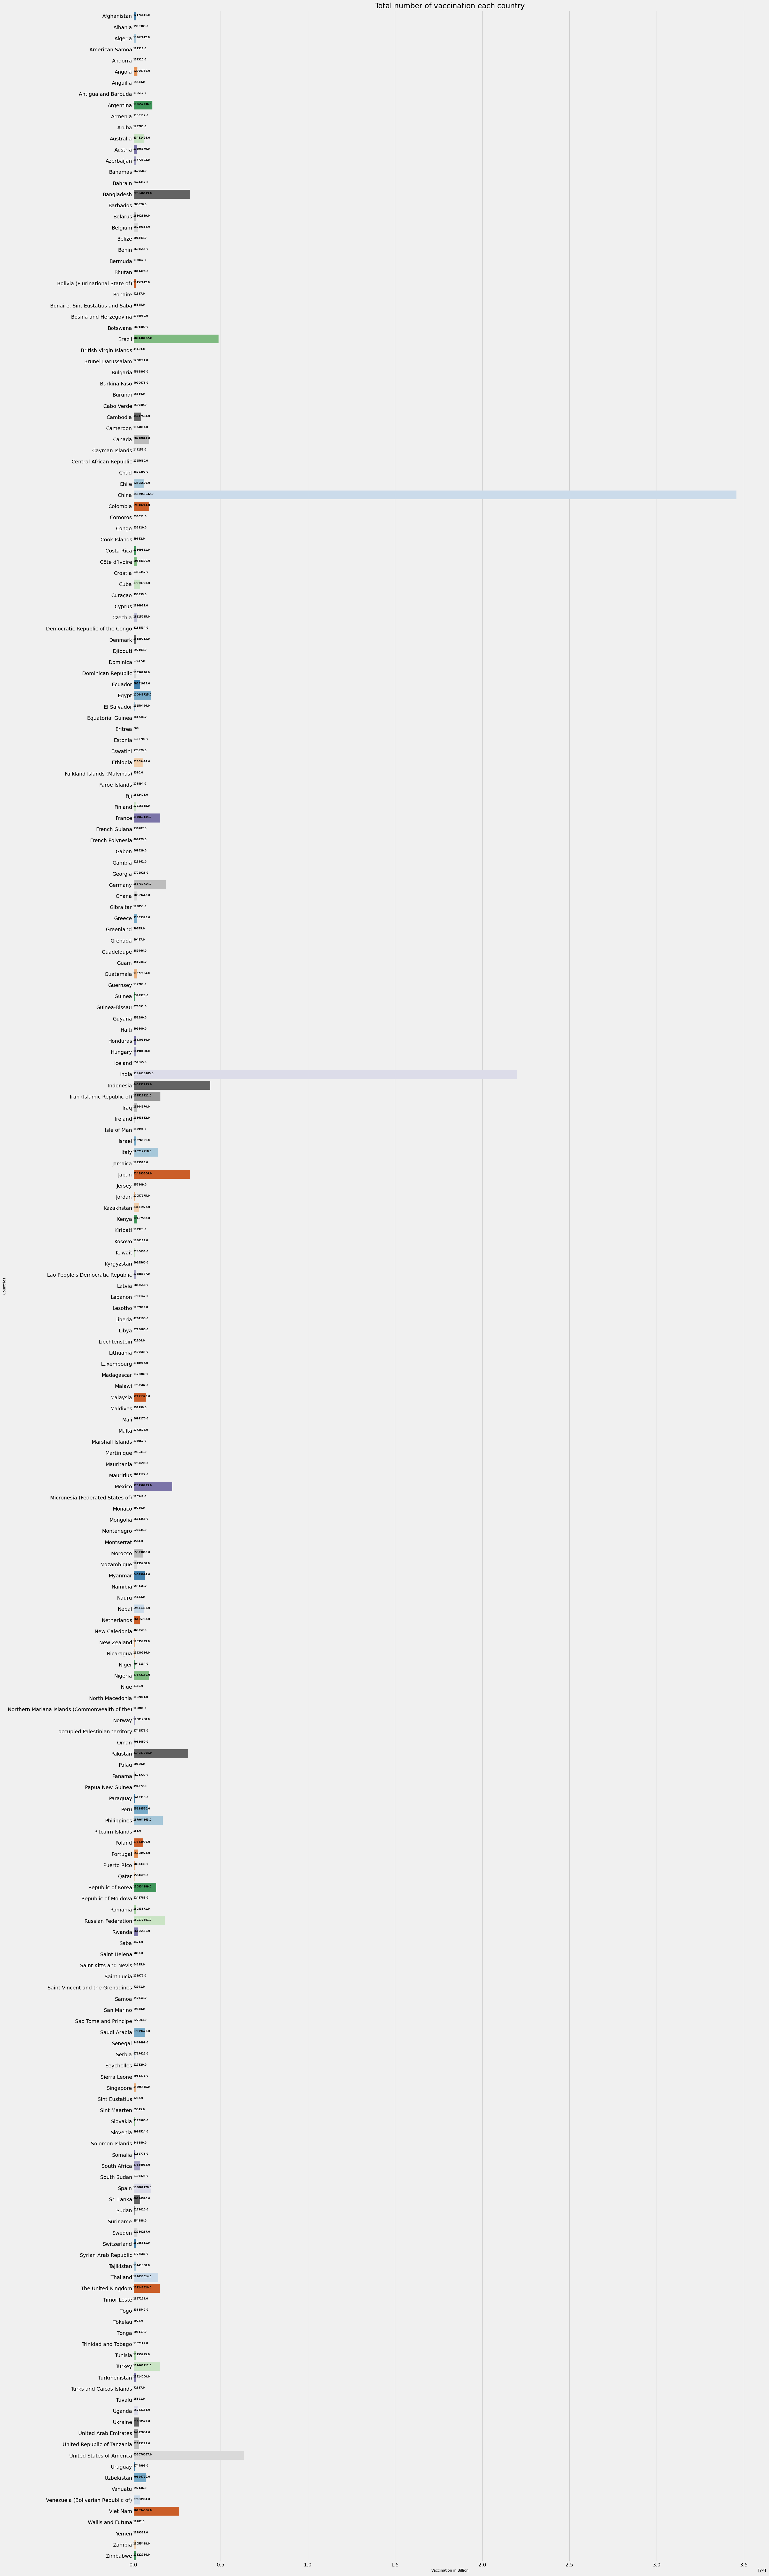

In [5]:
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')


main_df = pd.read_csv("data/vaccination_data.csv")
# main_df
plt.figure(figsize=(30,100))
ax = sns.barplot(x="TOTAL_VACCINATIONS", y="COUNTRY",
                 data=main_df, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(main_df["TOTAL_VACCINATIONS"]):
    ax.text(.6, i, j, weight='bold', color = 'black', fontsize =7)
plt.title("Total number of vaccination each country")
ax.set_xlabel(xlabel = 'Vaccination in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

### plotting on map

#### plotting on the basis of year

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


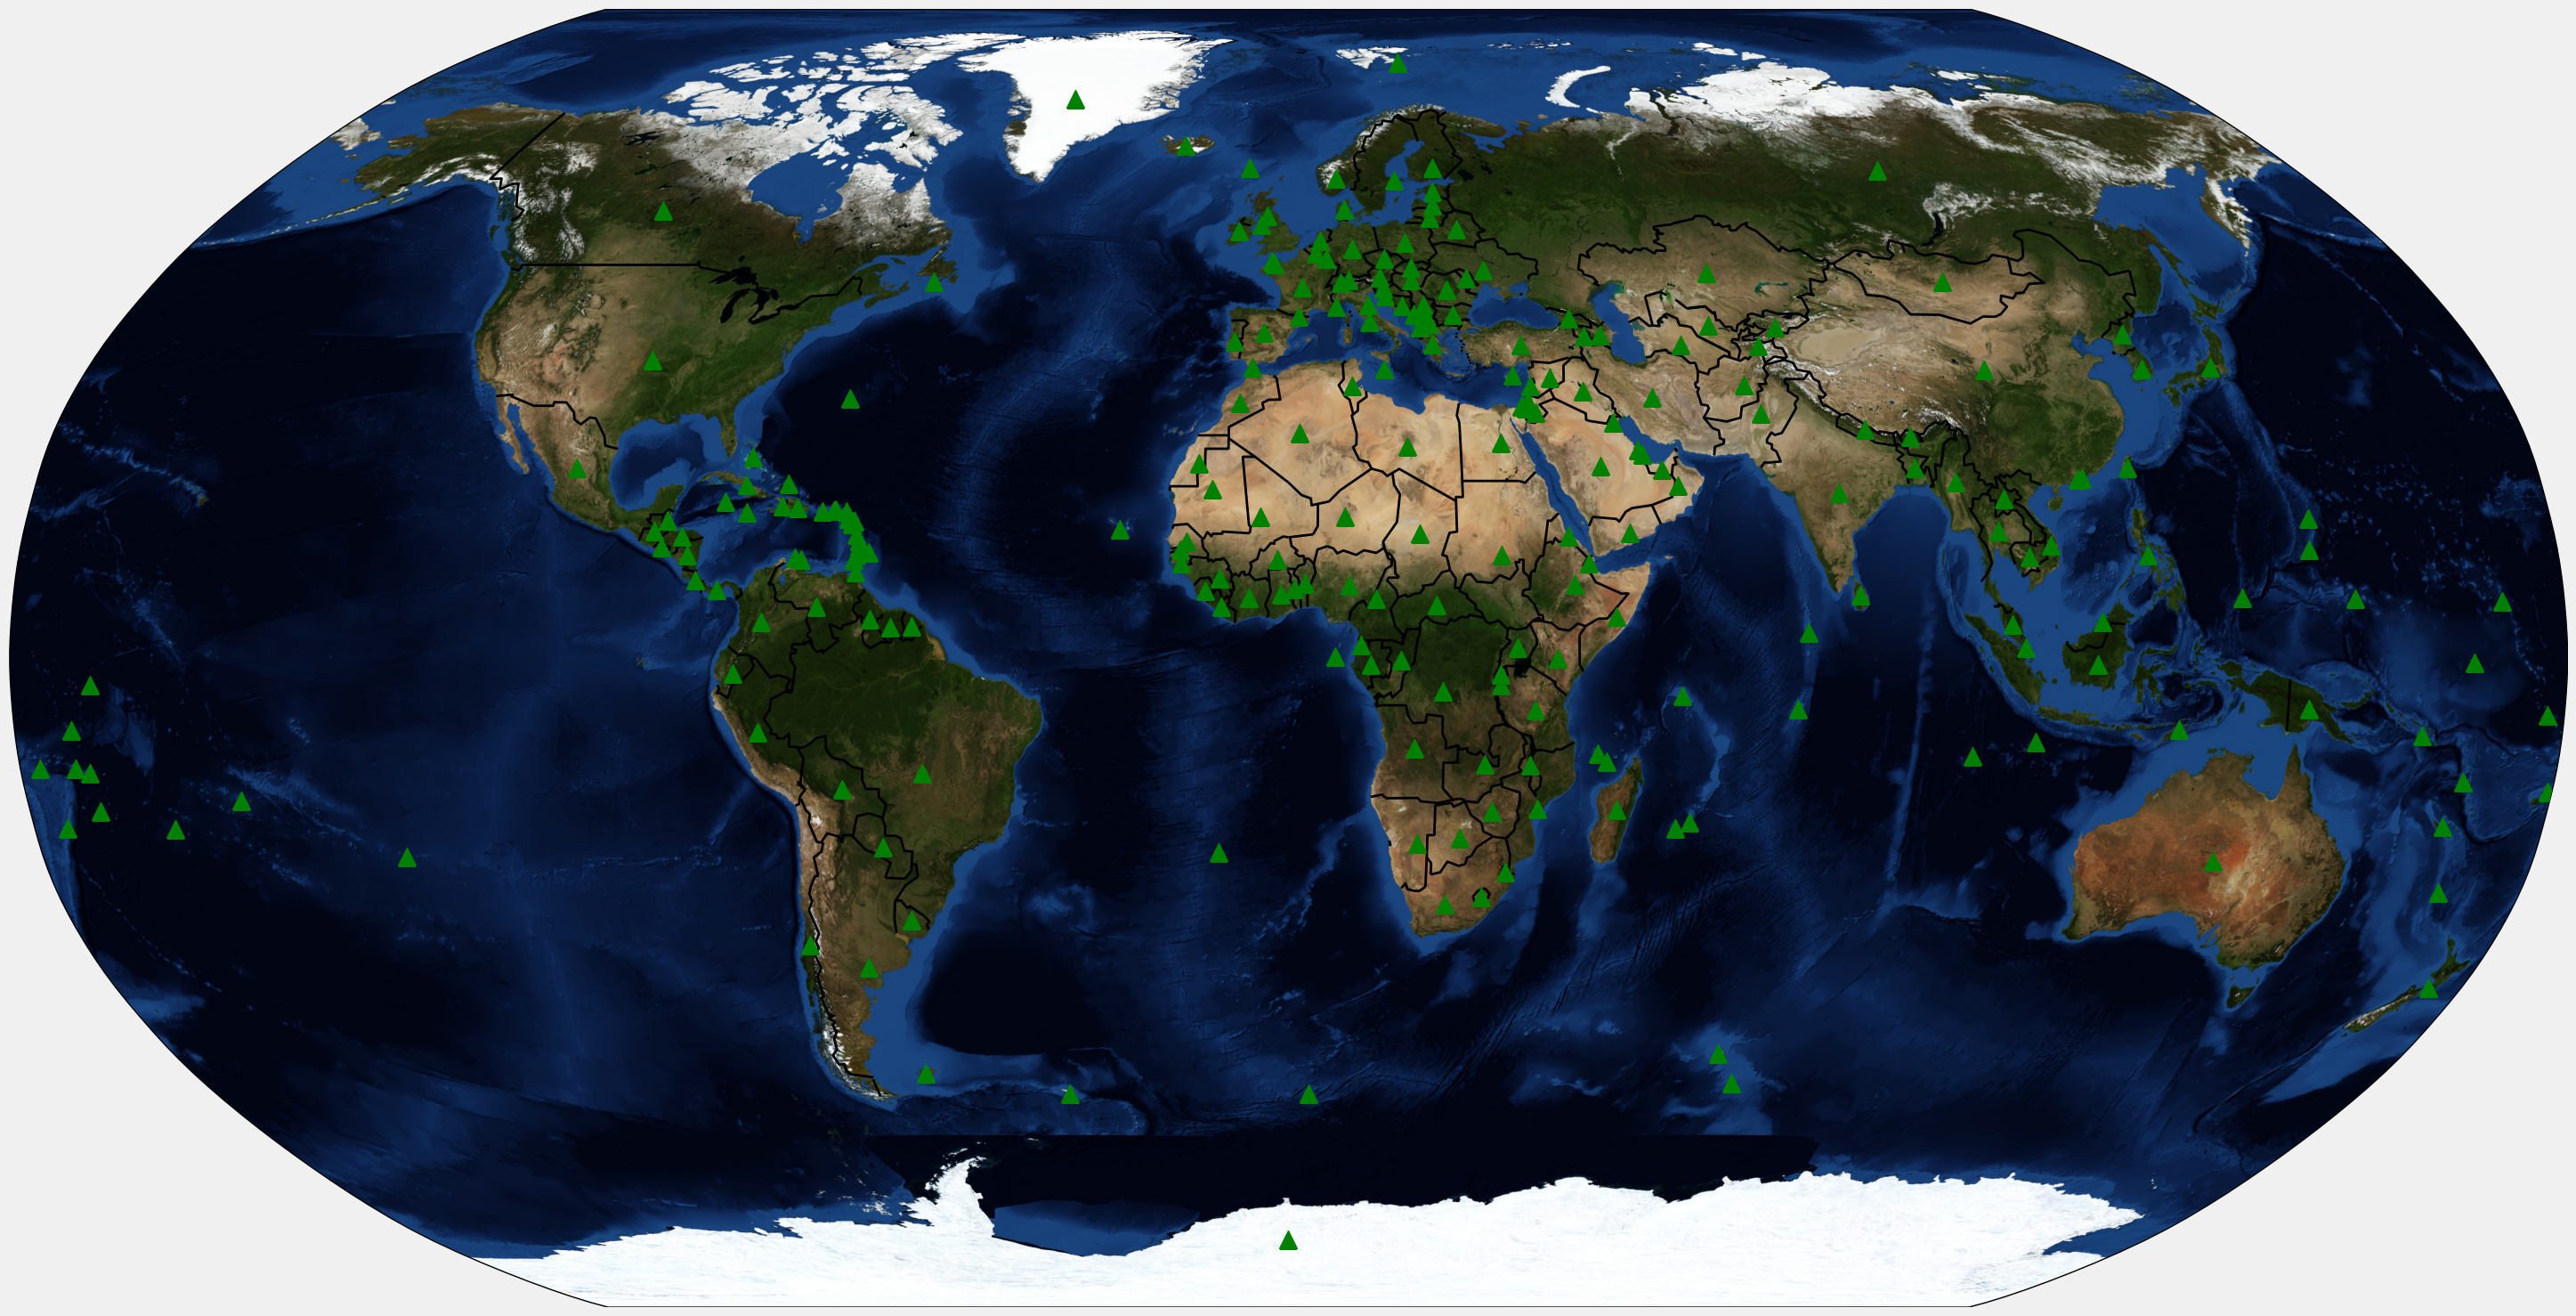

In [56]:
from mpl_toolkits.basemap import Basemap

cords_df=pd.read_csv("data/country_cords.csv")

# m = Basemap(projection='mill', resolution='l')
m = Basemap(projection='robin', lon_0=0, resolution='c')#robinson projection is near to accurate

# m = Basemap(projection='lcc', resolution=None)
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
# --------------------------particular coordinates--------------------------
# m = Basemap(width=12000000,height=9000000,projection='lcc',
#             resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# -----------------------------------------------------------------------

# m.drawcoastlines()
m.drawcountries(linewidth=2)
# m.drawstates(color='b')
# m.bluemarble()
# m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
# m.drawmapboundary(fill_colour='aqua')
# m.fillcontinents(color='#ffffff', lake_color='aqua')
# NYClat, NYClon = 55.7127, 0.10059
# xpt, ypt = m(NYClon, NYClat)
# m.plot(xpt, ypt, 'c*', markersize=15)
# LAlat, LAlon = 34.05, -118.25
# xpt, ypt = m(LAlon, LAlat)
# m.plot(xpt, ypt, 'g^', markersize=15)
for i,row in cords_df.iterrows():
    #we can apply year filters here
    xpt, ypt = m(row['longitude'], row['latitude'])
    m.plot(xpt, ypt, 'g^', markersize=15)